In [21]:
import pandas as pd 
import matplotlib.pyplot as plt

DATA_PATH = "../data/"

In [22]:
data = pd.read_csv(f'{DATA_PATH}reddit_post.csv')
# combined_data = pd.read_csv(f'{DATA_PATH}reddit_post_combined.csv')

In [23]:
# plot the histogram of the length of body in combined data
# combined_data['body'].str.len().hist()
# print(combined_data['body'].str.len().describe())

In [24]:
def split_2000(data: pd.DataFrame):
    # find data that are longer than 2000 characters 
    data_long = data[data['body'].str.len() > 2000]
    # remove data that are longer than 2000 characters
    data = data[data['body'].str.len() <= 2000]
    # split the data that are longer than 2000 characters into multiple rows
    new_rows = []
    # find the index of the first space after 1000 characters
    for index, row in data_long.iterrows():        
        body = row['body']
        first_space = body.find(' ', 800)
        new_rows.append({
            'author': row['author'],
            'body': body[:first_space].strip(),
            'mbti': row['mbti']
        })
        second_space = body.find(' ', first_space+800)
        new_rows.append({
            'author': row['author'],
            'body': body[first_space:second_space].strip(),
            'mbti': row['mbti']
        })
        new_rows.append({
            'author': row['author'],
            'body': body[second_space:].strip(),
            'mbti': row['mbti']
        })
    temp_df = pd.DataFrame(new_rows)
    print(temp_df.describe())
    data = pd.concat([data, temp_df])
    return data
data = split_2000(data)

          author    body    mbti
count     159207  159207  159207
unique      5363  158831      16
top     roland00            INTP
freq        4125      15   32418


In [25]:
def split_1400(data: pd.DataFrame):
    # find data that are longer than 1600 characters 
    data_long = data[data['body'].str.len() > 1400]
    # remove data that are longer than 1600 characters
    data = data[data['body'].str.len() <= 1400]
    # split the data that are longer than 1600 characters into multiple rows
    new_rows = []
    # find the index of the first space after 800 characters
    for index, row in data_long.iterrows():        
        body = row['body']
        sep = len(body) // 2
        first_space = body.find(' ', sep)
        new_rows.append({
            'author': row['author'],
            'body': body[:first_space].strip(),
            'mbti': row['mbti']
        })
        new_rows.append({
            'author': row['author'],
            'body': body[first_space:].strip(),
            'mbti': row['mbti']
        })
    temp_df = pd.DataFrame(new_rows)
    print(temp_df.describe())
    data = pd.concat([data, temp_df])
    return data
data = split_1400(data)

        author    body    mbti
count   209524  209524  209524
unique    7101  209286      16
top      Kafke       7    INTP
freq      3174      12   41932


        author                                               body    mbti
count   400116                                             400116  400116
unique    8548                                             399647      16
top      Kafke  associated with that brandideologyindividual  ...    INTP
freq      4688                                                 15   80202


<Axes: >

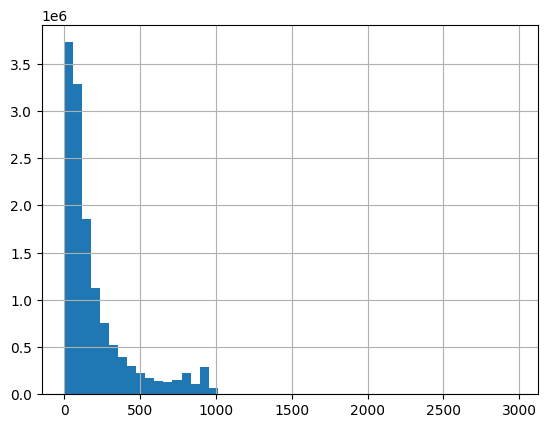

In [26]:
def split_1000(data: pd.DataFrame):
    # find data that are longer than 1000 characters 
    data_long = data[data['body'].str.len() > 1000]
    # remove data that are longer than 1000 characters
    data = data[data['body'].str.len() <= 1000]
    # split the data that are longer than 1000 characters into multiple rows
    new_rows = []
    # find the index of the first space after 500 characters
    for index, row in data_long.iterrows():        
        body = row['body']
        # find the last space after 1000 characters
        first_space = body.find(' ', 900)
        new_rows.append({
            'author': row['author'],
            'body': body[:first_space].strip(),
            'mbti': row['mbti']
        })
        new_rows.append({
            'author': row['author'],
            'body': body[first_space:].strip(),
            'mbti': row['mbti']
        })
    temp_df = pd.DataFrame(new_rows)
    print(temp_df.describe())
    data = pd.concat([data, temp_df])
    return data
data = split_1000(data)
# plot the histogram of the length of body in data
data['body'].str.len().hist(bins=50)

            author                                               body     mbti
count      3170074                                            3170074  3170074
unique       11477                                            3169389       16
top     bunker_man  wipes out the pathetic little thing you call y...     INFP
freq         29708                                                 12   679023
<class 'pandas.core.frame.DataFrame'>
Index: 3170074 entries, 0 to 3179480
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   author  object
 1   body    object
 2   mbti    object
dtypes: object(3)
memory usage: 96.7+ MB
None


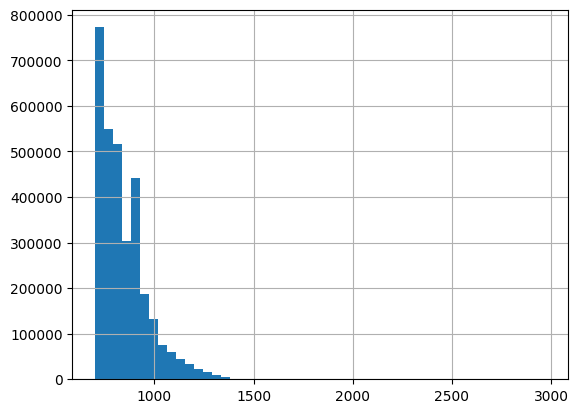

In [27]:
# Function to concatenate body strings of each author
def concatenate_bodies(group, min_length):
    concatenated = ''
    for body in group['body']:
        if len(body) >= min_length:
            yield body.strip()
        else:
            if len(concatenated) > 0:
                concatenated += ' '
            concatenated += body.strip()
            if len(concatenated) >= min_length:
                yield concatenated
                concatenated = ''
    if len(concatenated) > 0:
        yield concatenated

# List to collect the new rows
new_rows = []

n = 700

# Group by 'author' and process each group
for author, group in data.groupby('author'):
    for concatenated_body in concatenate_bodies(group, n):
        new_rows.append({
            'author': author,
            'body': concatenated_body,
            'mbti': group.iloc[0]['mbti']  # assuming 'mbti' is the same for all rows of the same author
        })

# Create a new DataFrame from the new rows
new_df = pd.DataFrame(new_rows)

# remove rows with length less than n 
new_df = new_df[new_df['body'].str.len() >= n]
# plot the histogram of the length of body in new data bin=50
new_df['body'].str.len().hist(bins=50)
print(new_df.describe())
print(new_df.info())

<Axes: >

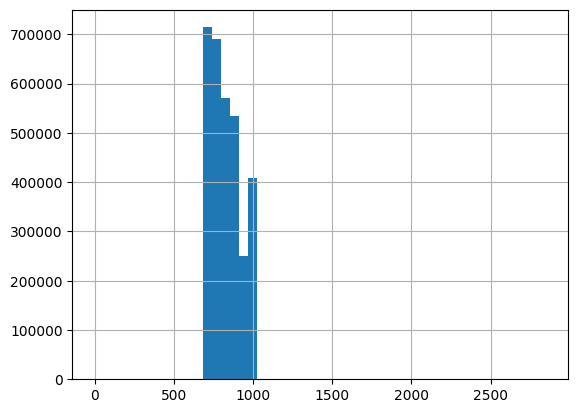

In [28]:
# trim body to the last space before 1000 

def trim_body(data: pd.DataFrame, n: int):
    data_long = data[data['body'].str.len() > n]
    data = data[data['body'].str.len() < n]
    new_rows = []
    for index, row in data_long.iterrows():
        body = row['body']
        last_space = body.rfind(' ', 0, n)
        new_rows.append({
            'author': row['author'],
            'body': body[:last_space].strip(),
            'mbti': row['mbti']
        })
    temp_df = pd.DataFrame(new_rows)
    data = pd.concat([data, temp_df])
    return data
new_df = trim_body(new_df, 1000)

new_df['body'].str.len().hist(bins=50)

In [30]:
new_df.describe()

,author,body,mbti
count,3167168,3167168,3167168
unique,11476,3166486,16
top,bunker_man,wipes out the pathetic little thing you call y...,INFP
freq,29681,12,678389
